<a href="https://colab.research.google.com/github/dhivyapm/CS7357/blob/master/NN_HW_3_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('https://raw.githubusercontent.com/kevinsuo/CS7357/master/project/3/data/MNIST.csv',sep=',')

In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
acc_per_fold = []
loss_per_fold = []

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#save the model history in a list after fitting so that we can plot later
model_history = []
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
model_history = []
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train/255
    X_test = X_test/255
    image_size = 784 # 28*28
    num_classes = 10 # ten unique digits

    model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
    model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=5)
    scores = model.evaluate(X_test, y_test)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print('-'*120)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    model_history.append(history)
    # Increase fold number
    fold_no = fold_no + 1
print('-'*80)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-'*80)
  print(f' Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-'*80)
print(f'Maximun accuracy from all folds: {np.max(acc_per_fold)}')
print(f'Minimun loss from all folds: {np.min(loss_per_fold)}')
print('-'*80)

Epoch 1/5
29/29 [==============================] - 1s 12ms/step - loss: 2.2818 - acc: 0.2660 - val_loss: 2.0312 - val_acc: 0.4900
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss: 1.9064 - acc: 0.6158 - val_loss: 1.8019 - val_acc: 0.5800
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 1.6698 - acc: 0.6746 - val_loss: 1.6158 - val_acc: 0.6300
Epoch 4/5
29/29 [==============================] - 0s 4ms/step - loss: 1.4759 - acc: 0.7214 - val_loss: 1.4683 - val_acc: 0.7000
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 1.3493 - acc: 0.7200
Score for fold 1: loss of 1.3493040800094604; acc of 72.00000286102295%
------------------------------------------------------------------------------------------------------------------------
Epoch 1/5
29/29 [==============================] - 1s 13ms/step - loss: 2.2895 - acc: 0.2400 - val_loss: 1.9900 - val_acc: 0.5700
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss:

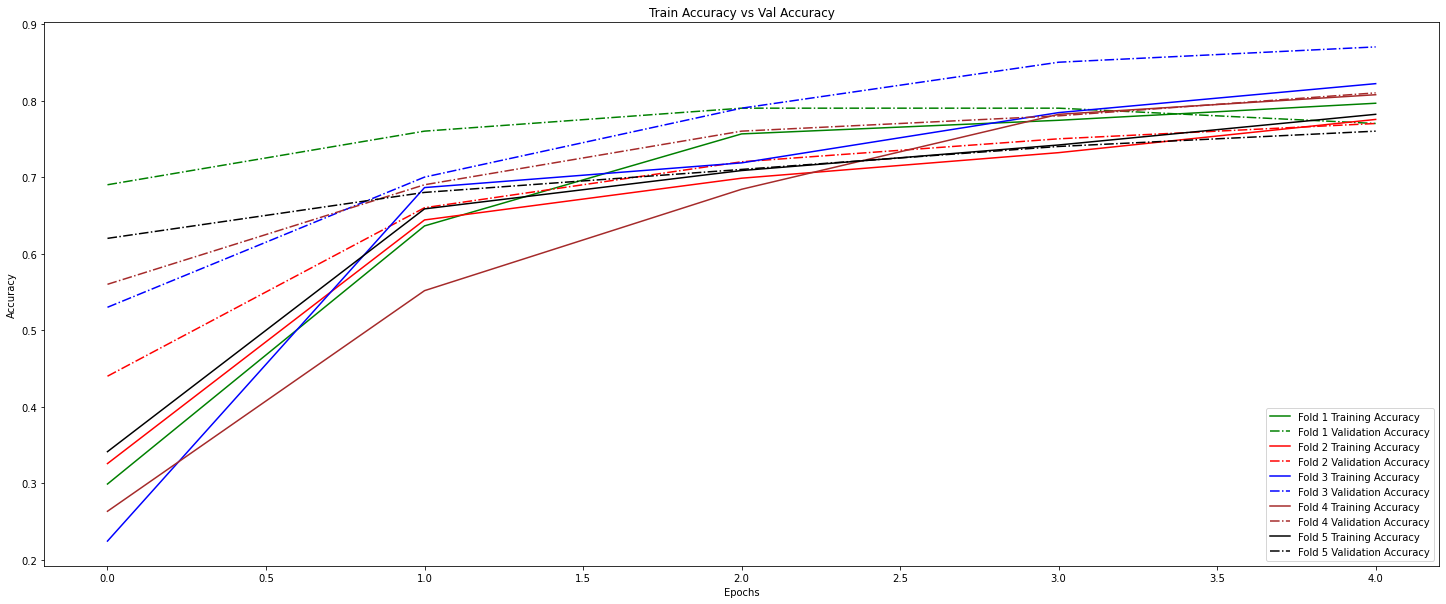

In [12]:
plt.figure(figsize=(25,10))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['acc'], label='Fold 1 Training Accuracy ', color='green')
plt.plot(model_history[0].history['val_acc'], label='Fold 1 Validation Accuracy', color='green', linestyle = "dashdot")
plt.plot(model_history[1].history['acc'], label='Fold 2 Training Accuracy', color='red', )
plt.plot(model_history[1].history['val_acc'], label='Fold 2 Validation Accuracy', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['acc'], label='Fold 3 Training Accuracy', color='blue', )
plt.plot(model_history[2].history['val_acc'], label='Fold 3 Validation Accuracy', color='blue', linestyle = "dashdot")
plt.plot(model_history[3].history['acc'], label='Fold 4 Training Accuracy', color='brown', )
plt.plot(model_history[3].history['val_acc'], label='Fold 4 Validation Accuracy', color='brown', linestyle = "dashdot")
plt.plot(model_history[4].history['acc'], label='Fold 5 Training Accuracy', color='black', )
plt.plot(model_history[4].history['val_acc'], label='Fold 5 Validation Accuracy', color='black', linestyle = "dashdot")    
plt.legend()
plt.show()

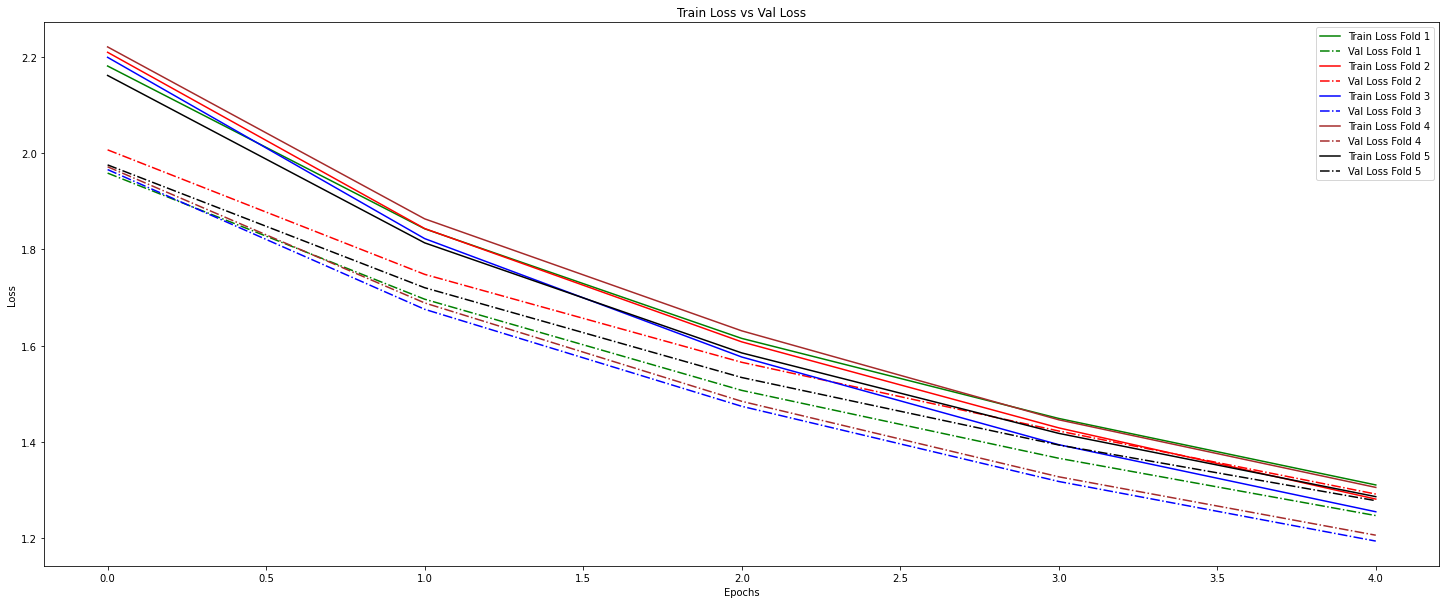

In [13]:
plt.figure(figsize=(25,10))
plt.title('Train Loss vs Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(model_history[0].history['loss'], label='Train Loss Fold 1', color='green')
plt.plot(model_history[0].history['val_loss'], label='Val Loss Fold 1', color='green', linestyle = "dashdot")
plt.plot(model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['loss'], label='Train Loss Fold 3', color='blue', )
plt.plot(model_history[2].history['val_loss'], label='Val Loss Fold 3', color='blue', linestyle = "dashdot")
plt.plot(model_history[3].history['loss'], label='Train Loss Fold 4', color='brown', )
plt.plot(model_history[3].history['val_loss'], label='Val Loss Fold 4', color='brown', linestyle = "dashdot")
plt.plot(model_history[4].history['loss'], label='Train Loss Fold 5', color='black', )
plt.plot(model_history[4].history['val_loss'], label='Val Loss Fold 5', color='black', linestyle = "dashdot")    
plt.legend()
plt.show()